## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### DBSCAN - Demo 3

* Utilização do algoritmo DBSCAN com diferentes parâmetros.
* Base de dados sintéticas
* Como escolher os parâmetros `epsilon` e `minpoints`

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


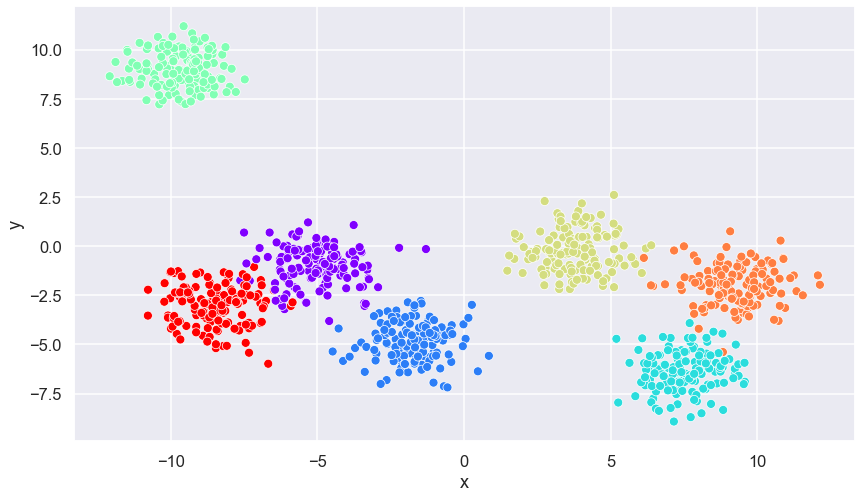

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

In [4]:
def train_and_plot(data, eps=0.5, min_samples=5):
    
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

### Como escolher os parâmetros do DBSCAN
Uma das formas de conseguir escolher os parâmetros do DBSCAN é utilizando o que chamamos de `K-dist plot`. Vamos ver como funciona.

Para gerar o K-dist plot, vamos utilizar o KNN

In [5]:
from sklearn.neighbors import NearestNeighbors

Definimos um valor de `n_neighbors` de acordo com o valor de `min_samples` que queremos no DBSCAN.

In [6]:
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors)
neighbors = knn.fit(X)

Obtemos as distâncias e os índices correspondentes

In [7]:
distances, indices = neighbors.kneighbors(X)

In [8]:
distances

array([[0.        , 0.13781425, 0.17131113, 0.21717494, 0.31687794],
       [0.        , 0.16937128, 0.31229258, 0.41921146, 0.42648965],
       [0.        , 0.11479897, 0.14719153, 0.15367032, 0.19550865],
       ...,
       [0.        , 0.18653944, 0.27634352, 0.2917523 , 0.29615156],
       [0.        , 0.80985029, 1.3297054 , 1.34308704, 1.34329468],
       [0.        , 0.08454136, 0.4821653 , 0.6991463 , 1.0081483 ]])

Ordenamos as distâncias do K-ésimo vizinho mais próximo (neste caso, o 5º) de forma crescente.

In [9]:
distances = np.sort(distances, axis=0)
distances = distances[:, n_neighbors-1]

Fazemos o plot e devemos procurar por onde existe um aumento acentuado.

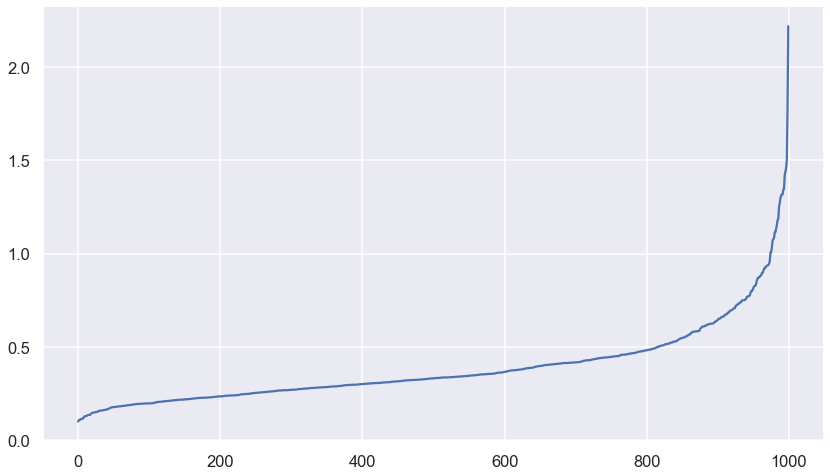

In [10]:
plt.plot(distances)

Escolhemos o valor que parece melhor. Neste caso, podemos utilizar algum valor entre `0.5` e `0.8`.

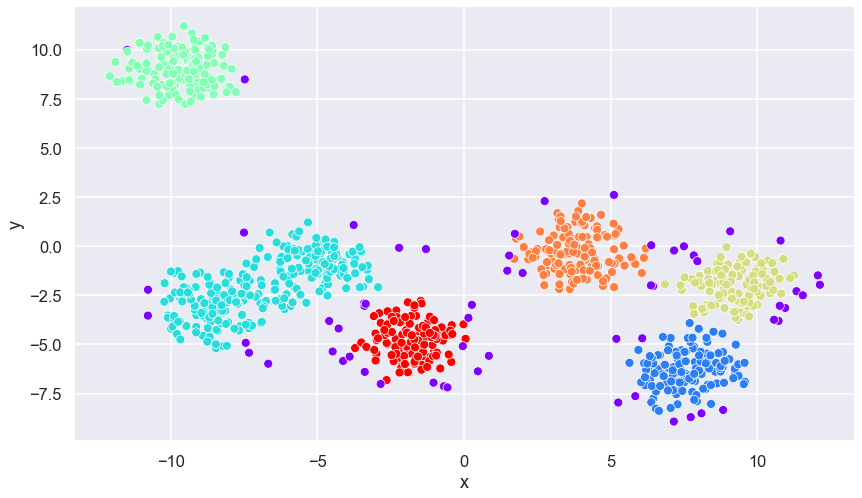

In [11]:
eps = 0.6
min_samples = 5

train_and_plot(df, eps, min_samples)

### Execução em diferentes bases de dados

In [12]:
def do_kdist_plot(X, n_neighbors=5):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors = knn.fit(X)
    
    distances, indices = neighbors.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:, n_neighbors-1]
    
    plt.plot(distances)

In [13]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


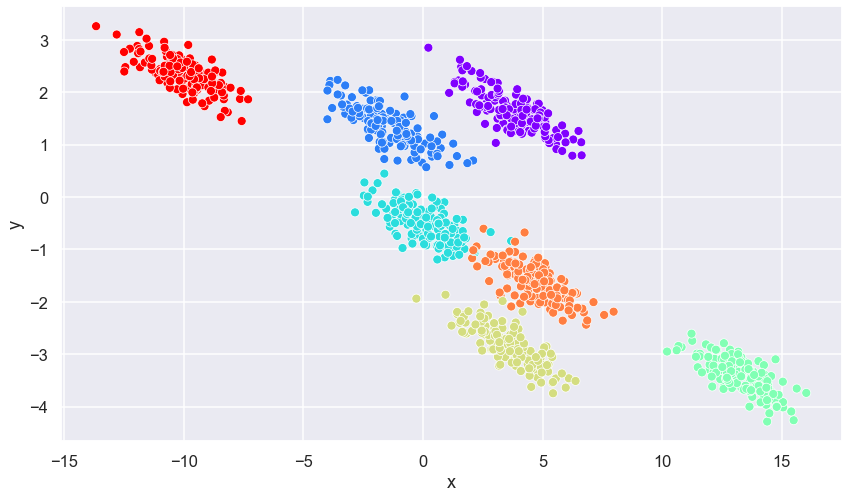

In [14]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

#### Exemplo com 5

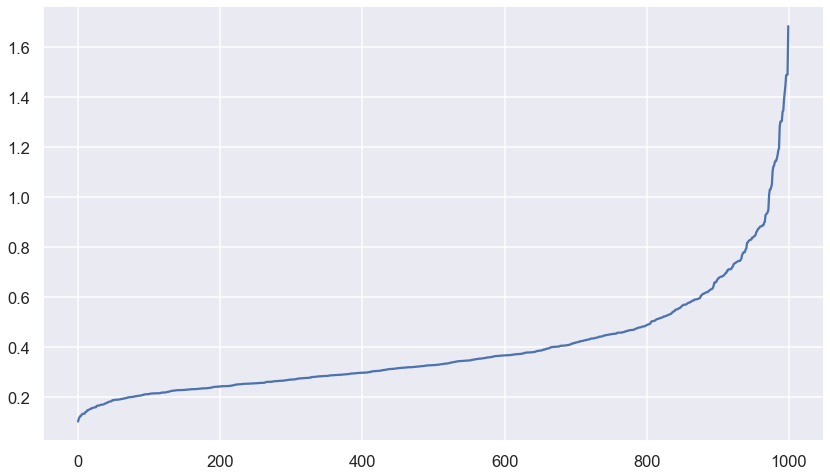

In [15]:
do_kdist_plot(X, n_neighbors=5)

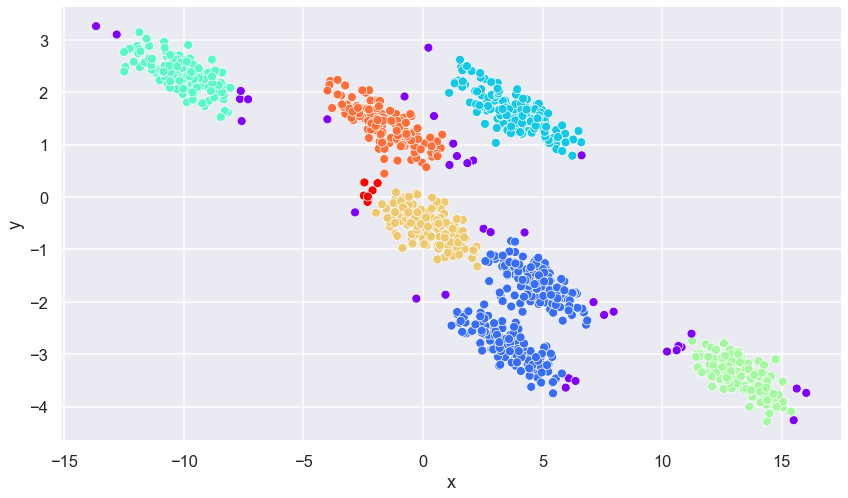

In [16]:
train_and_plot(df_transformed, eps=0.4, min_samples=5)

#### Exemplo com 10

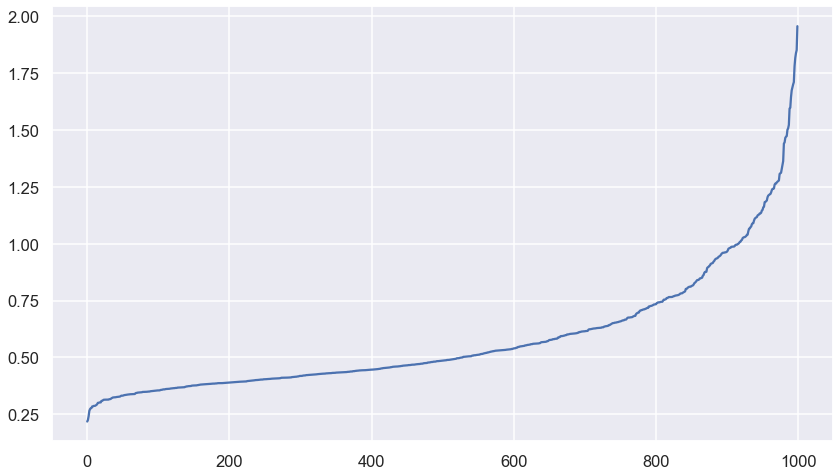

In [17]:
do_kdist_plot(X, n_neighbors=10)

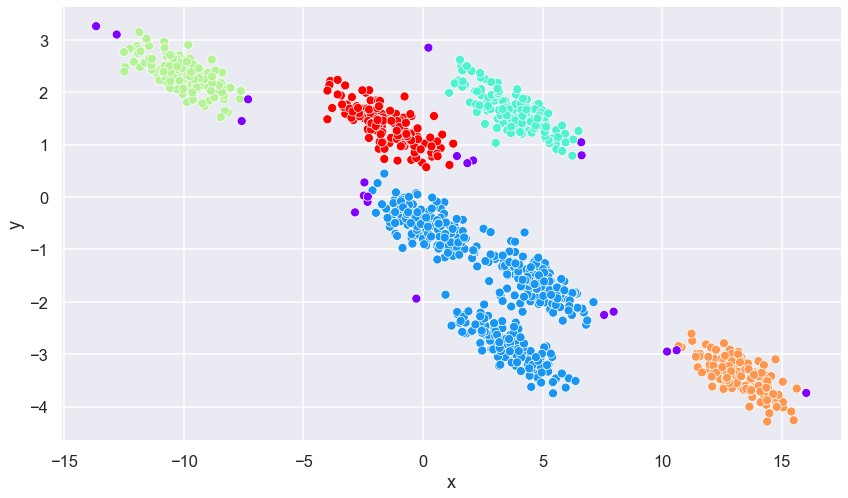

In [18]:
train_and_plot(df_transformed, eps=0.6, min_samples=10)

In [19]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


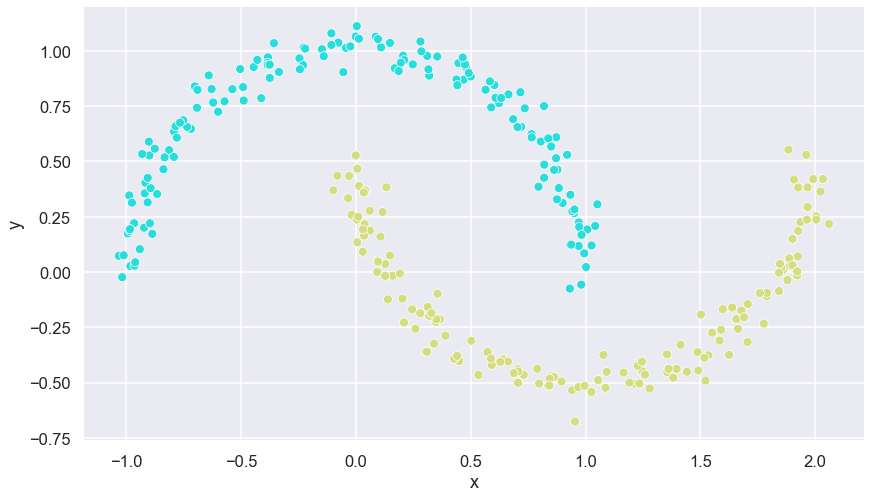

In [20]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

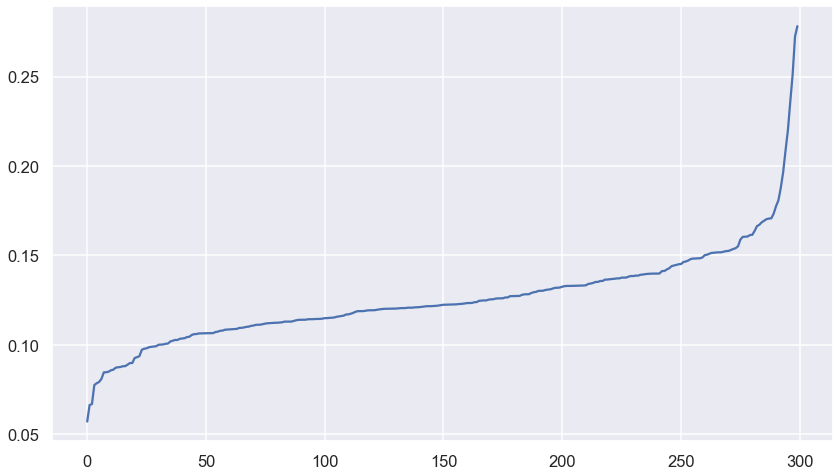

In [21]:
do_kdist_plot(X, n_neighbors=10)

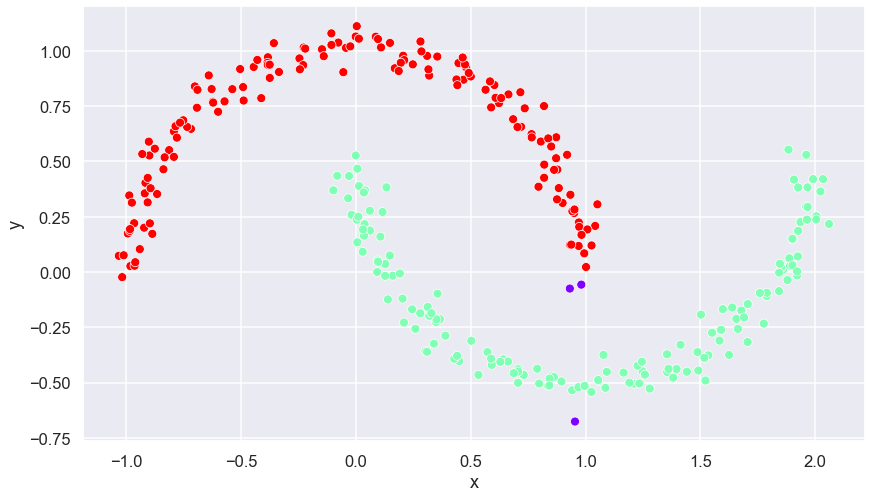

In [22]:
train_and_plot(df_moon, eps=0.14, min_samples=10)